In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
iris=load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df['target'] = iris.target

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df0 = df[df.target == 0]
#en(df1)
#  OR
#df1.shape

In [8]:
df1 =df[df.target == 1]
#df1
df2 =df[df.target == 2]
#df2
#len(df2)

In [9]:
import matplotlib.pyplot as plt

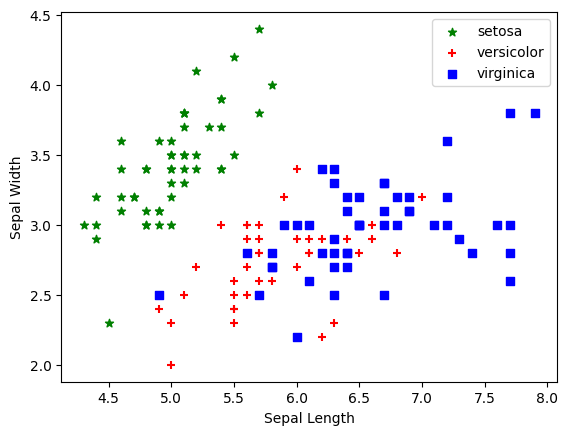

In [10]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker='*',label='setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="red",marker='+',label='versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color="blue",marker=',',label='virginica')
plt.legend()


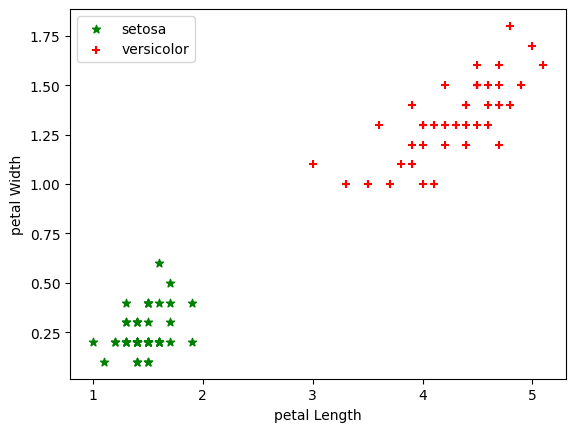

In [11]:
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker='*',label='setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="red",marker='+',label='versicolor')
#plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="blue",marker=',',label='virginica')
plt.legend()

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [13]:
X = df.iloc[:,0:4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
len(X_train)

120

In [17]:
len(X_test)

30

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
accuracy = knn.score(X_test,y_test)
accuracy

1.0

In [20]:
knn.predict([[6.9,3.0,1.5,0.3]])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

# Plot Confusion Matrix

In [21]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

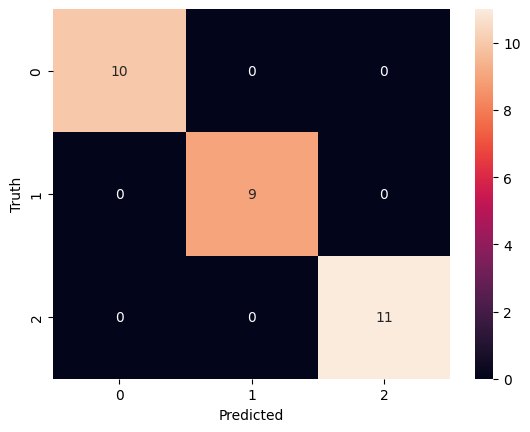

In [22]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
cl=classification_report(y_pred,y_test)
print(cl)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# want to save this file by using Pickle to local drive

In [24]:
import pickle

In [25]:
with open('knn_demo_K','wb') as f:
    pickle.dump(knn,f)

# Open the saved file - knn_demo by using pickle cmd

In [26]:
with open('knn_demo','rb') as f:
    model_pickle = pickle.load(f)

# Now directly use object name as model_pickle.predict('pass values')

In [27]:
model_pickle.predict([[6.9,3.0,1.5,0.3]])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
 # array([0]) is the same answer coming as it was coming earlier

# ----------------------------------------------------

# Now the same thing we will do by using Scikit Learn library - sklearn.joblib

In [29]:
import joblib

In [30]:
joblib.dump(knn,'knn_joblib_demo')

['knn_joblib_demo']

In [31]:
model_joblib = joblib.load('knn_joblib_demo')

In [32]:
model_joblib.predict([[6.9,3.0,1.5,0.3]])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [33]:
# array([0]) is the same answer coming as it was coming earlier